In [66]:
%matplotlib inline

In [67]:
from pyspark.sql import SparkSession
from pandas import DataFrame
spark = SparkSession.builder.getOrCreate()

# Nombre de vaccinées par sexe

In [68]:
vaccin = spark.read.load("./data/Vaccinations/hom-fem.csv", format="csv", header=True, inferSchema="True")

In [69]:
vaccin.printSchema()

root
 |-- fra: string (nullable = true)
 |-- sexe: integer (nullable = true)
 |-- jour: string (nullable = true)
 |-- n_dose1: integer (nullable = true)
 |-- n_cum_dose1: integer (nullable = true)



In [70]:
vaccin.take(10)

[Row(fra='FR', sexe=1, jour='2020-12-27', n_dose1=7, n_cum_dose1=7),
 Row(fra='FR', sexe=1, jour='2020-12-28', n_dose1=9, n_cum_dose1=16),
 Row(fra='FR', sexe=1, jour='2020-12-29', n_dose1=31, n_cum_dose1=47),
 Row(fra='FR', sexe=1, jour='2020-12-30', n_dose1=37, n_cum_dose1=84),
 Row(fra='FR', sexe=1, jour='2020-12-31', n_dose1=18, n_cum_dose1=102),
 Row(fra='FR', sexe=1, jour='2021-01-01', n_dose1=12, n_cum_dose1=114),
 Row(fra='FR', sexe=1, jour='2021-01-02', n_dose1=28, n_cum_dose1=142),
 Row(fra='FR', sexe=1, jour='2021-01-03', n_dose1=43, n_cum_dose1=185),
 Row(fra='FR', sexe=1, jour='2021-01-04', n_dose1=596, n_cum_dose1=781),
 Row(fra='FR', sexe=1, jour='2021-01-05', n_dose1=2120, n_cum_dose1=2901)]

In [71]:
newVaccin = vaccin.select(['sexe','n_cum_dose1'])
maxVaccin = newVaccin.where(newVaccin.sexe != '0').groupBy("sexe").agg({"n_cum_dose1" : "max"}).collect()
maxVaccin = DataFrame(maxVaccin, columns=['sexe','n_cum_dose1'])
maxVaccin

,sexe,n_cum_dose1
0,1,636250
1,2,978221


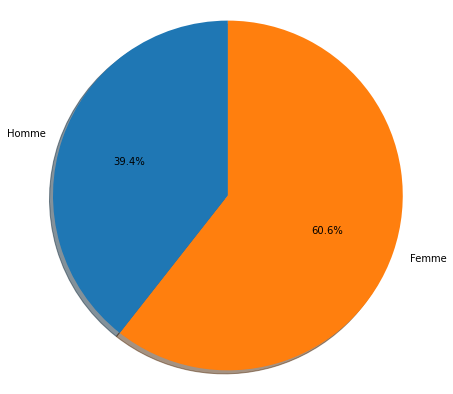

In [72]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labelsT = 'Homme', 'Femme'
sizesT = []

for i in range(len(maxVaccin)):
    sizesT.append(maxVaccin["n_cum_dose1"][i])

fig2, ax2 = plt.subplots()
ax2.pie(sizesT, labels=labelsT, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

figt = plt.gcf()
figt.set_size_inches(7,7)

plt.show()